In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [202]:
RAND_STATE = 34 # for reproducible shuffling 
TT_RATIO = 0.3 # test/train

In [203]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
numerical_df=df.select_dtypes(include=np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


**1. X-y split (y is the target variable, which is the total claim amount)**

In [204]:
X = numerical_df.drop(['total_claim_amount'], axis = 1)
y = numerical_df.total_claim_amount

In [205]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [206]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [207]:
y = numerical_df[['total_claim_amount']].copy()
y

,total_claim_amount
0,292
1,744
2,480
3,484
4,707
...,...
10684,1214
10685,273
10686,381
10687,618


**2. Train-test split.**

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2705,4786,45515,61,10,33,0,9
2209,22445,80340,71,32,35,0,2
4004,6412,58776,83,20,50,2,4


In [209]:
y_train

,total_claim_amount
2705,236
2209,511
4004,478
1898,768
10016,450
...,...
5667,712
324,806
3157,35
5993,422


In [210]:
y_test

,total_claim_amount
5613,542
9585,60
2042,303
7819,552
8261,345
...,...
8764,209
7120,355
6782,60
1687,93


In [211]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2705,4786,45515,61,10,33,0,9
2209,22445,80340,71,32,35,0,2
4004,6412,58776,83,20,50,2,4
1898,2254,48978,65,7,95,0,1
10016,7427,28848,96,22,54,0,7
...,...,...,...,...,...,...,...
5667,6650,44264,99,16,65,2,3
324,11124,46994,112,25,69,0,2
3157,2617,98338,65,13,33,0,1
5993,3387,23156,88,9,6,2,1


In [212]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
5613,9035,34337,113,20,44,0,9
9585,4376,63774,111,18,63,0,1
2042,4428,58577,110,6,62,0,1
7819,3997,18448,62,25,79,1,3
8261,24660,22070,72,25,33,0,2
...,...,...,...,...,...,...,...
8764,8189,72191,68,5,48,0,2
7120,8377,28135,74,14,38,0,2
6782,7147,87454,89,30,88,0,6
1687,2839,71460,74,11,77,5,1


**3. Standardize the data (after the data split).**

In [213]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train) # get the parameters using the train set and apply to them

In [214]:
X_test_s = scaler.transform(X_test) # apply the parameters of the train set to the test set

# You don't transform the target feature.

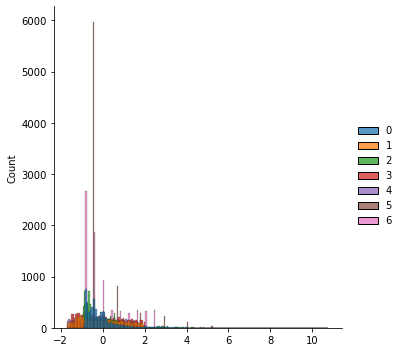

In [215]:
sns.displot(X_train_s)

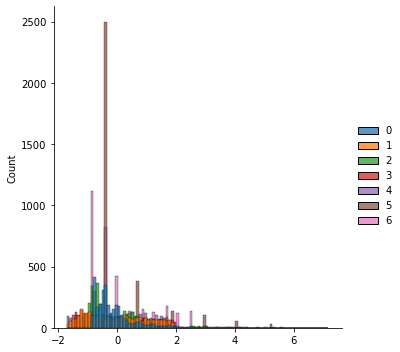

In [216]:
sns.displot(X_test_s)

**4. Apply linear regression.**

In [217]:
X_train_const = sm.add_constant(X_train_s)

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test_s)
predictions_test = model.predict(X_test_const)


In [218]:
X_train_const = pd.DataFrame(X_train_s)
X_train_const 

,0,1,2,3,4,5,6
0,-0.463463,-0.259427,-0.945841,-0.505684,-0.531276,-0.417180,2.489044
1,2.063006,1.144456,-0.653122,1.676281,-0.459758,-0.417180,-0.408773
2,-0.230831,0.275157,-0.301858,0.486118,0.076627,1.828387,0.419175
3,-0.825716,-0.119825,-0.828753,-0.803225,1.685783,-0.417180,-0.822747
4,-0.085616,-0.931316,0.078677,0.684479,0.219663,-0.417180,1.661096
...,...,...,...,...,...,...,...
7477,-0.196781,-0.309858,0.166492,0.089397,0.613013,1.828387,0.005201
7478,0.443313,-0.199805,0.547027,0.982020,0.756049,-0.417180,-0.408773
7479,-0.773781,1.870001,-0.828753,-0.208143,-0.531276,-0.417180,-0.822747
7480,-0.663618,-1.160775,-0.155499,-0.604864,-1.496770,1.828387,-0.822747


**5. Model Interpretation.**

In [219]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     753.9
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:44:17   Log-Likelihood:                -51074.
No. Observations:                7482   AIC:                         1.022e+05
Df Residuals:                    7474   BIC:                         1.022e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.580    168.931      0.0

In [220]:
model.predict(X_test_const)

array([566.25106634, 521.33654694, 520.03402606, ..., 369.75327028,
       305.09641556, 293.77230533])

In [221]:
#Making predictions
y_pred = pd.DataFrame(predictions_test,columns = ['total_claim_amt_pred_test'] )      # model prediction
y_pred_train =  pd.DataFrame(predictions_train, columns = ['total_claim_amt_pred_train'])


In [222]:
model=LinearRegression()    # model
model.fit(X_train_const, y_train)   # model train

LinearRegression()

In [223]:
model.coef_

array([[-5.99598283e+00, -3.17043664e+01,  1.87098365e+02,
         2.05563615e+00, -6.47737048e-01, -5.95820844e-01,
        -1.54903758e-01]])

In [224]:
y_pred_train

,total_claim_amt_pred_train
0,269.035719
1,269.032999
2,371.807951
3,287.153998
4,481.845864
...,...
7477,476.680164
7478,543.694822
7479,226.415780
7480,446.280744


**01.02.23**

**1. MSE, MAE**

In [225]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
##prediction on the train set
print(mse(y_train,y_pred_train))

52330.379323255
153.89185609233462
49747.15936894187


**2. RMSE**

In [226]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse

228.758342630941

**3. R2**

In [227]:
R2=r2_score(y_test,y_pred)
R2

0.39992389876814205

**4. Adjusted R2**

In [228]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3986108219601949

**5. Feature Importance.**

In [229]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.098365
1,income,31.704366
0,customer_lifetime_value,5.995983
3,months_since_last_claim,2.055636
4,months_since_policy_inception,0.647737
5,number_of_open_complaints,0.595821
6,number_of_policies,0.154904


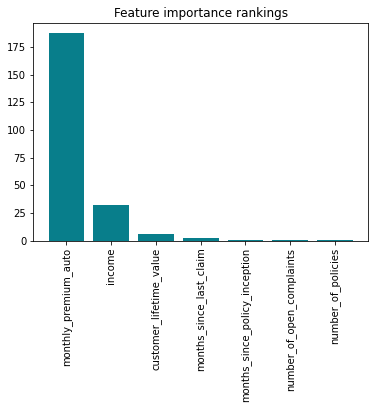

In [230]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()





**Model evaluating and improving**

**Please rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).**

In [232]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
categorical_df=df.select_dtypes(include=np.object)
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [233]:
## Sorting columns if the feature is hierarchical (ordinal) and non-hierarchical (nominal) 
nominal_df = categorical_df[["region", "response", "employment_status", "gender", "location_code", "marital_status", "policy_type", "policy", "sales_channel", "vehicle_class"]]
ordinal_df = categorical_df[["coverage", "education", "month", "renew_offer_type", "vehicle_size"]]

In [234]:
## Dummifying the nominal columns:

nominal_df = pd.get_dummies(nominal_df, drop_first = True)
nominal_df

,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,policy_special l2,policy_special l3,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
10685,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10687,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [235]:
## Ordinal encoding the ordinal columns:

pd.options.mode.chained_assignment = None 

ordinal_df["coverage"] = ordinal_df["coverage"].replace({"basic": 0, "extended": 1, "premium": 2})
ordinal_df["education"] = ordinal_df["education"].replace("bachelor", "college")
ordinal_df["education"] = ordinal_df["education"].replace({"high school or below": 0, "college": 1, "master": 2, "doctor": 3})
ordinal_df["month"] = ordinal_df["month"].replace({"jan": 1, "feb": 2})
ordinal_df["renew_offer_type"] = ordinal_df["renew_offer_type"].replace({"offer1": 1, "offer2": 2, "offer3": 3, "offer4": 4})
ordinal_df["vehicle_size"] = ordinal_df["vehicle_size"].replace({"small": 0, "medsize": 1, "large": 2})
ordinal_df

,coverage,education,month,renew_offer_type,vehicle_size
0,0,1,2,3,1
1,0,1,1,4,1
2,0,1,2,3,1
3,1,1,1,2,1
4,2,1,1,1,1
...,...,...,...,...,...
10684,2,1,1,3,1
10685,0,1,1,2,1
10686,1,1,2,1,1
10687,2,1,2,1,1


In [236]:
# concatenating both categorical dataframes and the numerical one

df = pd.concat([nominal_df, ordinal_df, numerical_df], axis=1)
df

,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,renew_offer_type,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,0,0,0,1,0,0,0,1,1,...,3,1,4809,48029,61,7,52,0,9,292
1,0,0,1,0,0,0,0,1,0,1,...,4,1,2228,92260,64,3,26,0,1,744
2,1,0,0,0,1,0,0,0,1,1,...,3,1,14947,22139,100,34,31,0,2,480
3,0,1,0,1,1,0,0,0,1,1,...,2,1,22332,49078,97,10,3,0,2,484
4,0,1,0,0,0,1,0,0,0,1,...,1,1,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,1,0,1,...,3,1,15563,61541,253,12,40,0,7,1214
10685,0,1,0,0,1,0,0,0,0,0,...,2,1,5259,61146,65,7,68,0,6,273
10686,0,0,0,0,1,0,0,0,0,0,...,1,1,23893,39837,201,11,63,0,2,381
10687,0,0,1,0,1,0,0,0,0,0,...,1,1,11971,64195,158,0,27,4,6,618


In [237]:
# X/y split (dependent and independent features):

X = df.drop(['total_claim_amount'], axis = 1)
y = df.total_claim_amount


In [242]:
# Test-train split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)



,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,month,renew_offer_type,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
4993,0,0,1,0,1,0,0,0,1,1,...,1,3,1,3924,56480,101,32,65,0,1
592,0,1,0,0,1,0,0,0,1,0,...,1,3,1,10914,71656,137,3,88,0,8
9501,0,0,0,0,1,0,0,0,0,1,...,2,2,1,3653,74126,90,14,76,0,1


In [240]:
# Applying linear regression:

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()
y_pred_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

In [241]:
# Veryfing the model:

print(model.summary()) # R-squared was 0.414 and now it is 0.770. It is improved

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     869.1
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:50:47   Log-Likelihood:                -67848.
No. Observations:               10664   AIC:                         1.358e+05
Df Residuals:                   10622   BIC:                         1.361e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     